# DCGAN sample using tensorflow

tensorflow を利用して MNIST で DCGAN を実行するサンプルです。

- [Deep Convolutional Generative Adversarial Network][tutorial]

[tutorial]: https://www.tensorflow.org/tutorials/generative/dcgan

## 環境の確認

In [1]:
!cat /etc/issue

Ubuntu 18.04.3 LTS \n \l



In [2]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        528M         10G        892K        1.9G         11G
Swap:            0B          0B          0B


In [3]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [4]:
!nvidia-smi

Sun Sep 29 09:03:14 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
!python --version

Python 3.6.8


In [0]:
from logging import Logger


def get_logger() -> Logger:
    import logging
    logger = logging.getLogger(__name__)

    fmt = "%(asctime)s %(levelname)s %(name)s :%(message)s"
    logging.basicConfig(level=logging.INFO, format=fmt)

    return logger


logger = get_logger()

In [7]:
def check_tf_version() -> None:
    import tensorflow as tf
    logger.info(tf.__version__)


check_tf_version()

2019-09-29 09:03:20,231 INFO __main__ :1.14.0


## ソースコードの取得

In [8]:
# 対象のコードを取得
!git clone -n https://github.com/iimuz/til.git
%cd til
!git checkout fdfa134
%cd python/dcgan_tensorflow

Cloning into 'til'...
remote: Enumerating objects: 586, done.
remote: Counting objects: 100% (586/586), done.
remote: Compressing objects: 100% (380/380), done.
remote: Total 586 (delta 222), reused 528 (delta 174), pack-reused 0
Receiving objects: 100% (586/586), 2.27 MiB | 2.52 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/content/til
Note: checking out 'fdfa134'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at fdfa134 fix: epoch 単位の loss 計算の場所を修正
/content/til/python/dcgan_tensorflow


## 実行

### 事前準備

In [0]:
import tensorflow.compat.v1 as tfv1


tfv1.enable_eager_execution()

### データセットの確認

11493376/11490434 [==============================] - 0s 0us/step


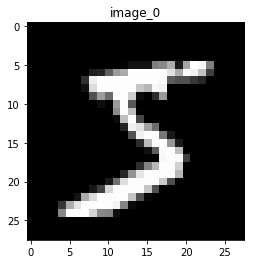

<Figure size 432x288 with 0 Axes>

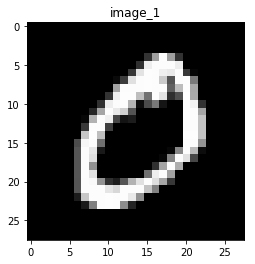

In [10]:
%run -i dataset.py

In [11]:
import dataset


raw_train, raw_test = dataset.get_batch_dataset()

2019-09-29 09:03:32,799 WARNING tensorflow :From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### ネットワークの確認

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

<Figure size 432x288 with 0 Axes>

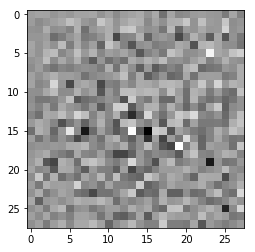

2019-09-29 09:03:36,308 INFO __main__ :decision result: [[0.00207541]]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [12]:
%run -i network.py

### 学習の実行

2019-09-29 09:57:12,043 INFO train :Epoch 99, Generator Loss: 0.9266701936721802, Discriminator Loss: 1.235046625137329, Time: 35.134628772735596 sec


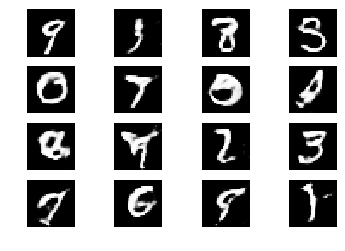

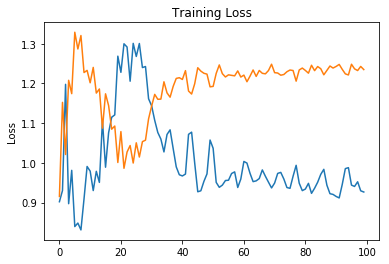

In [13]:
import train


train.train(raw_train, batch_size=256, epochs=100, gen_input_dim=100, disc_input_shape=(28, 28, 1))

### 結果

In [0]:
import utils

import IPython
from IPython import display

def show_generated_images():
    filepath = "_data/dcgan.gif"
    utils.save_gif("_data/", "image_at_epoch_*", filepath)

    try:
        from google.colab import files
    except ImportError:
        pass
    else:
        files.download(filepath)


show_generated_images()

2019-09-29 09:57:13,332 INFO utils :write gif from _data/image_at_epoch_0000.png
2019-09-29 09:57:13,351 INFO utils :write gif from _data/image_at_epoch_0001.png
2019-09-29 09:57:13,372 INFO utils :write gif from _data/image_at_epoch_0002.png
2019-09-29 09:57:13,393 INFO utils :write gif from _data/image_at_epoch_0004.png
2019-09-29 09:57:13,410 INFO utils :write gif from _data/image_at_epoch_0006.png
2019-09-29 09:57:13,428 INFO utils :write gif from _data/image_at_epoch_0008.png
2019-09-29 09:57:13,445 INFO utils :write gif from _data/image_at_epoch_0011.png
2019-09-29 09:57:13,463 INFO utils :write gif from _data/image_at_epoch_0015.png
2019-09-29 09:57:13,480 INFO utils :write gif from _data/image_at_epoch_0019.png
2019-09-29 09:57:13,498 INFO utils :write gif from _data/image_at_epoch_0023.png
2019-09-29 09:57:13,515 INFO utils :write gif from _data/image_at_epoch_0028.png
2019-09-29 09:57:13,532 INFO utils :write gif from _data/image_at_epoch_0034.png
2019-09-29 09:57:13,549 INFO